In [31]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import time

# Exercício 1

## 1.1 

### a)

In [32]:
# função para a produção de um padrão de bits aleatórios com um tamanho específico
def generate_pattern(size):
    """Generate a random bit pattern of specified size"""
    return np.random.randint(0, 2, size)

# testar com um padrão de tamanho 8
pattern_size = 8
target = generate_pattern(pattern_size)
print(f"Target pattern (size {pattern_size}):", target)

Target pattern (size 8): [0 1 1 1 1 0 0 1]


### b)

In [55]:
# Análise de pesquisa aleatória

def random_search(target, max_attempts=1000000):
    """
    Try to find the target pattern by generating random patterns.
    Returns number of attempts and time taken.
    """
    size = len(target)
    attempts = 0
    start_time = time.time()
    
    while attempts < max_attempts:
        attempts += 1
        guess = generate_pattern(size)
        
        if np.array_equal(guess, target):
            elapsed = time.time() - start_time
            return attempts, elapsed
    
    elapsed = time.time() - start_time
    return attempts, elapsed

# seed fixa para testes
np.random.seed(42)

# testar com um padrão de 4
small_target = generate_pattern(4)
attempts, elapsed = random_search(small_target)
print(f"\nRandom search test:")
print(f"Target: {small_target}")
print(f"Found in {attempts} attempts, {elapsed:.4f} seconds")



Random search test:
Target: [0 1 0 0]
Found in 1 attempts, 0.0000 seconds


In [34]:
pattern_sizes = [2, 4, 6, 8, 10, 12, 16] # nº de bits no padrão
n_tests = 30 # nº de tentativas = 30
max_time_seconds = 3600  # limite de 1 hora

results = {size: {'attempts': [], 'times': []} for size in pattern_sizes}

print("Running experiments for different pattern sizes...")
print("(stopping if execution time exceeds 1 hour)\n")

for size in pattern_sizes:
    print(f"Testing size {size}...")
    
    # seed fixa
    for seed in range(n_tests):
        np.random.seed(seed)
        target = generate_pattern(size)
        
        start = time.time()
        attempts, elapsed = random_search(target, max_attempts=10000000)
        
        results[size]['attempts'].append(attempts)
        results[size]['times'].append(elapsed)
        
        # confirmar que não passou o limite de uma hora
        if elapsed > max_time_seconds / n_tests:
            print(f"  Warning: Size {size} taking too long, limiting tests")
            break
    
    avg_time = np.mean(results[size]['times'])
    avg_attempts = np.mean(results[size]['attempts'])
    print(f"  Size {size}: avg {avg_attempts:.0f} attempts, avg {avg_time:.4f}s")
    
    # parar se o tempo médio for muito alto
    if avg_time * n_tests > max_time_seconds * 0.5:
        print(f"\nStopping at size {size} (projected time too high)")
        pattern_sizes = [s for s in pattern_sizes if s <= size]
        break

Running experiments for different pattern sizes...
(stopping if execution time exceeds 1 hour)

Testing size 2...
  Size 2: avg 3 attempts, avg 0.0000s
Testing size 4...
  Size 4: avg 21 attempts, avg 0.0004s
Testing size 6...
  Size 6: avg 65 attempts, avg 0.0011s
Testing size 8...
  Size 8: avg 223 attempts, avg 0.0027s
Testing size 10...
  Size 10: avg 985 attempts, avg 0.0120s
Testing size 12...
  Size 12: avg 4163 attempts, avg 0.0495s
Testing size 16...
  Size 16: avg 51844 attempts, avg 0.6010s


C:\Users\Ana Maria Ribeiro\AppData\Local\Temp\ipykernel_5808\805491834.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax1.boxplot(attempts_data, labels=pattern_sizes)
C:\Users\Ana Maria Ribeiro\AppData\Local\Temp\ipykernel_5808\805491834.py:16: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax2.boxplot(times_data, labels=pattern_sizes)


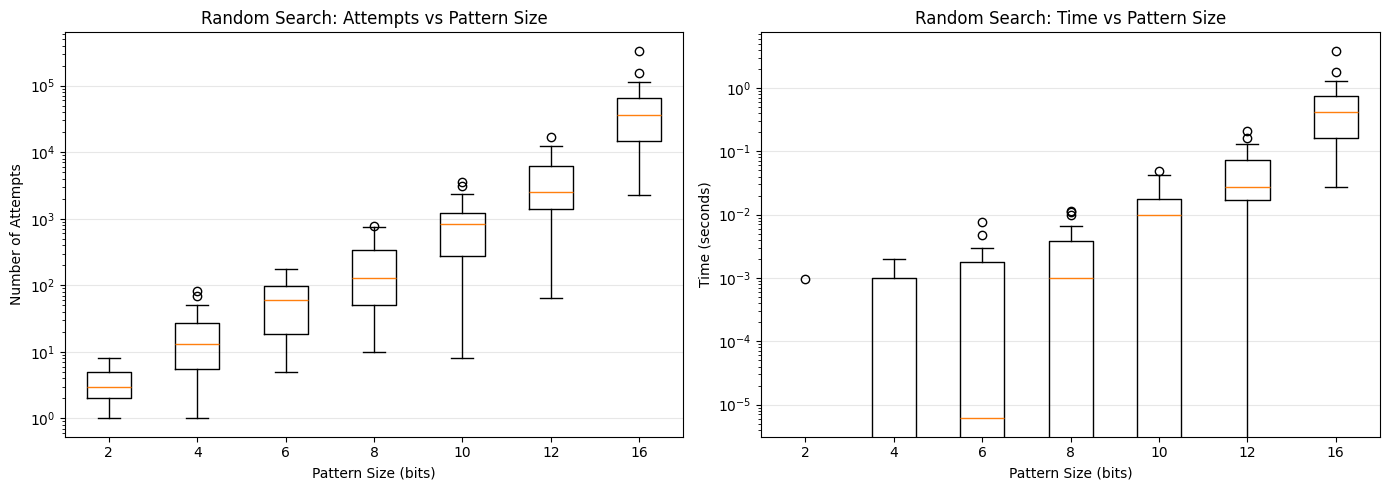


Comparison of attempts and execution times:
Size  2:          3 attempts,   0.0000s
Size  4:         21 attempts,   0.0004s
Size  6:         65 attempts,   0.0011s
Size  8:        223 attempts,   0.0027s
Size 10:        985 attempts,   0.0120s
Size 12:       4163 attempts,   0.0495s
Size 16:      51844 attempts,   0.6010s

Using pattern size 16 for remaining exercises


In [35]:
# Plots

# Plot 1: Tentativas vs. Tamanho do padrão
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

attempts_data = [results[size]['attempts'] for size in pattern_sizes]
ax1.boxplot(attempts_data, labels=pattern_sizes)
ax1.set_xlabel('Pattern Size (bits)')
ax1.set_ylabel('Number of Attempts')
ax1.set_title('Random Search: Attempts vs Pattern Size')
ax1.grid(alpha=0.3, axis='y')
ax1.set_yscale('log')

# Plot 2: Tempo vs. tamanho do padrão
times_data = [results[size]['times'] for size in pattern_sizes]
ax2.boxplot(times_data, labels=pattern_sizes)
ax2.set_xlabel('Pattern Size (bits)')
ax2.set_ylabel('Time (seconds)')
ax2.set_title('Random Search: Time vs Pattern Size')
ax2.grid(alpha=0.3, axis='y')
ax2.set_yscale('log')

plt.tight_layout()
plt.show()

print("\nComparison of attempts and execution times:")
for size in pattern_sizes:
    avg_att = np.mean(results[size]['attempts'])
    avg_time = np.mean(results[size]['times'])
    print(f"Size {size:2d}: {avg_att:10.0f} attempts, {avg_time:8.4f}s")

# selecionar o maior tamanho possível
working_size = max(pattern_sizes)
print(f"\nUsing pattern size {working_size} for remaining exercises")

### c)

In [48]:
# função de fitness
# usa um valor máximo do padrão adivinhado coincidente com o padrão correto

def fitness(guess, target):
    """
    Measure fitness of a guess compared to target.
    Maximum when patterns match exactly, decreases with distance.
    Using Hamming distance (number of matching bits).
    """
    return np.sum(guess == target)

# seed fixa para testar
np.random.seed(42)
target = generate_pattern(8)
guess1 = target.copy()
guess2 = generate_pattern(8)
guess3 = np.ones(8, dtype=int) - target  # Padrão oposto

print(f"Target:   {target}")
print(f"Guess 1:  {guess1} -> fitness: {fitness(guess1, target)}/{len(target)} (perfect match)")
print(f"Guess 2:  {guess2} -> fitness: {fitness(guess2, target)}/{len(target)}")
print(f"Guess 3:  {guess3} -> fitness: {fitness(guess3, target)}/{len(target)} (opposite)")


Target:   [0 1 0 0 0 1 0 0]
Guess 1:  [0 1 0 0 0 1 0 0] -> fitness: 8/8 (perfect match)
Guess 2:  [0 1 0 0 0 0 1 0] -> fitness: 6/8
Guess 3:  [1 0 1 1 1 0 1 1] -> fitness: 0/8 (opposite)


### d)

Hill Climbing with Mutation

Target: [0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0]

Running hill climbing (max 1000 mutations)...

Result:   [0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0]
Fitness:  16/16
Mutations: 52
Converged: Yes


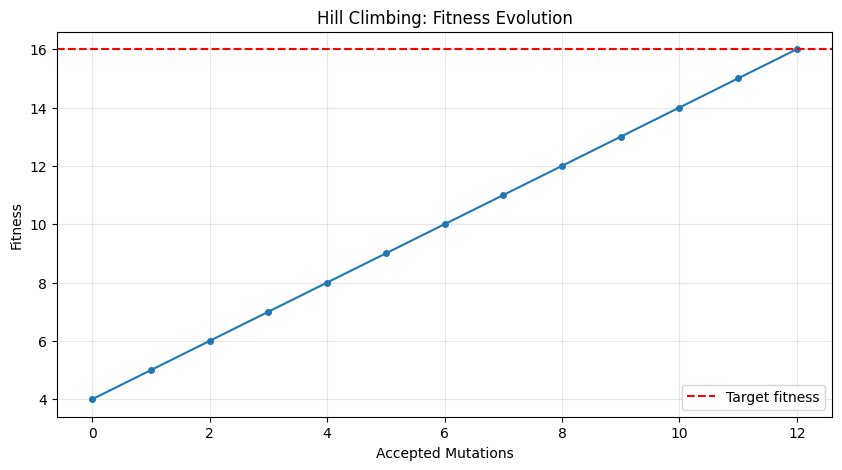


Testing convergence over 30 runs...

Convergence rate: 100.0% (30/30)
Average mutations when converged: 41.3

Conclusion: Hill climbing does NOT always converge to the correct solution
It gets stuck in local optima where no single bit flip improves fitness.


In [37]:
# função para mutar (inverter um bit)

def mutate(pattern):
    """Flip one random bit in the pattern"""
    mutated = pattern.copy()
    idx = np.random.randint(len(pattern))
    mutated[idx] = 1 - mutated[idx]
    return mutated

def hill_climbing(target, max_mutations=1000):
    """
    Use hill climbing with mutation to find target.
    Only accept mutations that improve fitness.
    """
    size = len(target)
    current = generate_pattern(size)
    current_fitness = fitness(current, target)
    
    mutations = 0
    fitness_history = [current_fitness]
    
    while mutations < max_mutations:
        candidate = mutate(current)
        candidate_fitness = fitness(candidate, target)
        
        # aceitar se melhor
        if candidate_fitness > current_fitness:
            current = candidate
            current_fitness = candidate_fitness
            fitness_history.append(current_fitness)
        
        mutations += 1
        
        # confirmar se encontrou uma melhor solução
        if current_fitness == size:
            return current, mutations, True, fitness_history
    
    return current, mutations, False, fitness_history

# testar hill climbing
print("Hill Climbing with Mutation\n")
np.random.seed(42)
target = generate_pattern(working_size)

print(f"Target: {target}")
print(f"\nRunning hill climbing (max 1000 mutations)...\n")

solution, mutations, converged, history = hill_climbing(target, max_mutations=1000)

print(f"Result:   {solution}")
print(f"Fitness:  {fitness(solution, target)}/{len(target)}")
print(f"Mutations: {mutations}")
print(f"Converged: {'Yes' if converged else 'No'}")

# Plot evolução da fitness
plt.figure(figsize=(10, 5))
plt.plot(history, marker='o', markersize=4)
plt.axhline(y=len(target), color='r', linestyle='--', label='Target fitness')
plt.xlabel('Accepted Mutations')
plt.ylabel('Fitness')
plt.title('Hill Climbing: Fitness Evolution')
plt.legend()
plt.grid(alpha=0.3)
plt.show()


# teste com 30 execuções
n_runs = 30
convergence_results = []
mutation_counts = []

print(f"\nTesting convergence over {n_runs} runs...\n")

for seed in range(n_runs):
    np.random.seed(seed)
    target = generate_pattern(working_size)
    solution, mutations, converged, _ = hill_climbing(target, max_mutations=1000)
    
    convergence_results.append(converged)
    mutation_counts.append(mutations if converged else 1000)

convergence_rate = np.mean(convergence_results) * 100
avg_mutations = np.mean([m for m, c in zip(mutation_counts, convergence_results) if c])

print(f"Convergence rate: {convergence_rate:.1f}% ({sum(convergence_results)}/{n_runs})")
if sum(convergence_results) > 0:
    print(f"Average mutations when converged: {avg_mutations:.1f}")
else:
    print("No runs converged")

print("\nConclusion: Hill climbing does NOT always converge to the correct solution")
print("It gets stuck in local optima where no single bit flip improves fitness.")


## 1.2

Genetic Algorithm with Selection and Mutation

Target: [0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0]
Population size: 100, Elite: 30%, Max generations: 100

Result:     [0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0]
Fitness:    16/16
Generations: 7
Converged:  Yes


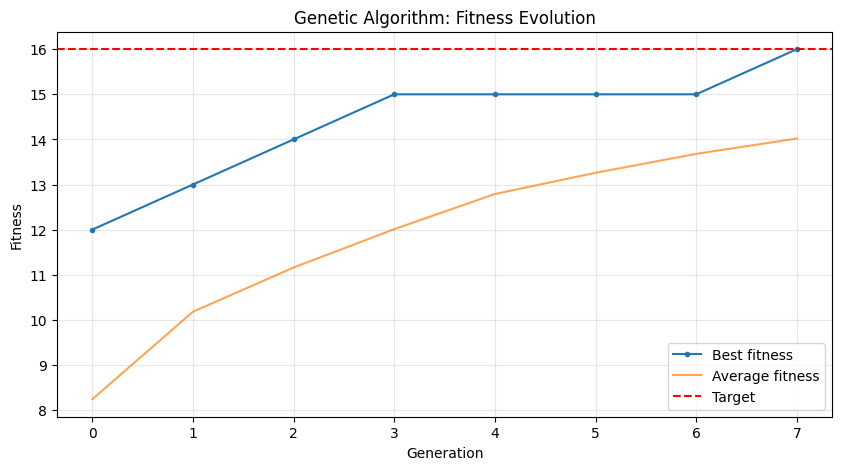

In [38]:
def genetic_algorithm_mutation(target, pop_size=100, generations=100, elite_ratio=0.3):
    """
    Genetic algorithm using selection and mutation.
    - Keep top 30% as elite
    - Generate remaining 70% by mutating elite
    """
    size = len(target) # definir número de bits
    n_elite = int(pop_size * elite_ratio) # selecionar os melhores 30%
    
    # inicializar a população
    population = [generate_pattern(size) for _ in range(pop_size)]
    
    # guardar o histórico relativo aos melhores e à média fitness
    best_fitness_history = []
    avg_fitness_history = []
    generation = 0
    stagnation = 0
    prev_best = 0
    
    while generation < generations: # repetir até atingir o número máximo de gerações (ou estagnar)
        # avaliar cada indivíduo com a função fitness (quantos bits certos)
        fitnesses = [fitness(ind, target) for ind in population]
        
        # adicionar ao histórico os valores
        best_fitness = max(fitnesses)
        avg_fitness = np.mean(fitnesses)
        
        best_fitness_history.append(best_fitness)
        avg_fitness_history.append(avg_fitness)
        
        # confirmar se existe uma solução
        if best_fitness == size:
            return population[np.argmax(fitnesses)], generation, True, best_fitness_history, avg_fitness_history
        
        # verificar se estagnou
        if best_fitness == prev_best:
            stagnation += 1
            if stagnation >= 20:  # parar se não houver uma melhoria nas últimas 20 gerações
                break
        else:
            stagnation = 0
            prev_best = best_fitness
        
        # seleção dos melhores indivíduos
        sorted_indices = np.argsort(fitnesses)[::-1]
        elite = [population[i] for i in sorted_indices[:n_elite]]
        
        # criar uma nova população
        new_population = elite.copy()  # 30% elite
        
        # 70% por mutação de um dos indivíduos de elite
        while len(new_population) < pop_size:
            parent = elite[np.random.randint(n_elite)]
            offspring = mutate(parent)
            new_population.append(offspring)
        
        population = new_population
        generation += 1
    
    # avaliação final
    fitnesses = [fitness(ind, target) for ind in population]
    best_idx = np.argmax(fitnesses)
    
    return population[best_idx], generation, False, best_fitness_history, avg_fitness_history

# testar algoritmo genético
print("Genetic Algorithm with Selection and Mutation\n")
np.random.seed(42)
target = generate_pattern(working_size)

print(f"Target: {target}")
print(f"Population size: 100, Elite: 30%, Max generations: 100\n")

solution, gens, converged, best_hist, avg_hist = genetic_algorithm_mutation(target, generations=100)

print(f"Result:     {solution}")
print(f"Fitness:    {fitness(solution, target)}/{len(target)}")
print(f"Generations: {gens}")
print(f"Converged:  {'Yes' if converged else 'No'}")

# plot
plt.figure(figsize=(10, 5))
plt.plot(best_hist, label='Best fitness', marker='o', markersize=3)
plt.plot(avg_hist, label='Average fitness', alpha=0.7)
plt.axhline(y=len(target), color='r', linestyle='--', label='Target')
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.title('Genetic Algorithm: Fitness Evolution')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

Comparing methods over 30 runs (pattern size 16)...

Results summary:

Random Search:
  Success rate: 90.0%
  Avg attempts: 41714
  Avg time: 0.4810s

Hill Climbing:
  Success rate: 100.0%
  Avg attempts: 44
  Avg time: 0.0006s

GA (Mutation):
  Success rate: 100.0%
  Avg attempts: 590
  Avg time: 0.0056s



C:\Users\Ana Maria Ribeiro\AppData\Local\Temp\ipykernel_5808\706990031.py:59: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0].boxplot(attempts_data, labels=['Random', 'Hill Climb', 'GA'])
C:\Users\Ana Maria Ribeiro\AppData\Local\Temp\ipykernel_5808\706990031.py:67: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1].boxplot(times_data, labels=['Random', 'Hill Climb', 'GA'])


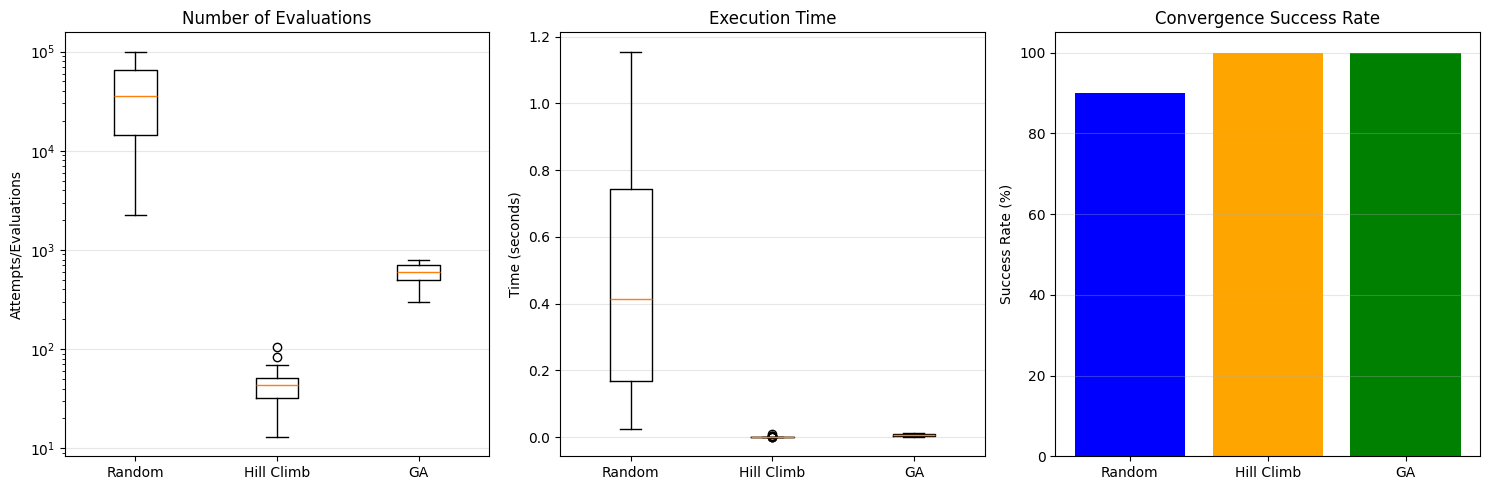

In [39]:
# comparação de métodos: Random, Hill Climbing e GA (com 30 execuções cada)

n_tests = 30
methods = {
    'Random Search': {'attempts': [], 'times': [], 'success': []},
    'Hill Climbing': {'attempts': [], 'times': [], 'success': []},
    'GA (Mutation)': {'attempts': [], 'times': [], 'success': []}
}

print(f"Comparing methods over {n_tests} runs (pattern size {working_size})...\n")

for seed in range(n_tests):
    np.random.seed(seed)
    target = generate_pattern(working_size)
    
    # Random Search
    start = time.time()
    attempts, _ = random_search(target, max_attempts=100000)
    elapsed = time.time() - start
    success = attempts < 100000
    methods['Random Search']['attempts'].append(attempts)
    methods['Random Search']['times'].append(elapsed)
    methods['Random Search']['success'].append(success)
    
    # Hill Climbing
    start = time.time()
    _, mutations, converged, _ = hill_climbing(target, max_mutations=1000)
    elapsed = time.time() - start
    methods['Hill Climbing']['attempts'].append(mutations)
    methods['Hill Climbing']['times'].append(elapsed)
    methods['Hill Climbing']['success'].append(converged)
    
    # Genetic Algorithm
    start = time.time()
    _, gens, converged, _, _ = genetic_algorithm_mutation(target, generations=100)
    elapsed = time.time() - start
    # contar o número de avaliações: pop_size * generations
    evaluations = 100 * gens
    methods['GA (Mutation)']['attempts'].append(evaluations)
    methods['GA (Mutation)']['times'].append(elapsed)
    methods['GA (Mutation)']['success'].append(converged)

print("Results summary:\n")
for method, data in methods.items():
    success_rate = np.mean(data['success']) * 100
    avg_attempts = np.mean(data['attempts'])
    avg_time = np.mean(data['times'])
    print(f"{method}:")
    print(f"  Success rate: {success_rate:.1f}%")
    print(f"  Avg attempts: {avg_attempts:.0f}")
    print(f"  Avg time: {avg_time:.4f}s\n")


# Plot das comparações
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot 1: Attempts/Evaluations
attempts_data = [methods[m]['attempts'] for m in ['Random Search', 'Hill Climbing', 'GA (Mutation)']]
axes[0].boxplot(attempts_data, labels=['Random', 'Hill Climb', 'GA'])
axes[0].set_ylabel('Attempts/Evaluations')
axes[0].set_title('Number of Evaluations')
axes[0].grid(alpha=0.3, axis='y')
axes[0].set_yscale('log')

# Plot 2: Time
times_data = [methods[m]['times'] for m in ['Random Search', 'Hill Climbing', 'GA (Mutation)']]
axes[1].boxplot(times_data, labels=['Random', 'Hill Climb', 'GA'])
axes[1].set_ylabel('Time (seconds)')
axes[1].set_title('Execution Time')
axes[1].grid(alpha=0.3, axis='y')

# Plot 3: Success Rate
success_rates = [np.mean(methods[m]['success'])*100 for m in ['Random Search', 'Hill Climbing', 'GA (Mutation)']]
axes[2].bar(['Random', 'Hill Climb', 'GA'], success_rates, color=['blue', 'orange', 'green'])
axes[2].set_ylabel('Success Rate (%)')
axes[2].set_title('Convergence Success Rate')
axes[2].set_ylim([0, 105])
axes[2].grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

## 1.3

In [58]:
def crossover(parent1, parent2):
    """
    Single-point crossover: combine two parents to create offspring.
    Choose random crossover point and swap segments.
    """
    size = len(parent1)
    point = np.random.randint(1, size)
    
    offspring1 = np.concatenate([parent1[:point], parent2[point:]])
    offspring2 = np.concatenate([parent2[:point], parent1[point:]])
    
    return offspring1, offspring2

# testar crossover
# np.random.seed(42)
p1 = generate_pattern(8)
p2 = generate_pattern(8)
o1, o2 = crossover(p1, p2)

print("Crossover example:")
print(f"Parent 1:    {p1}")
print(f"Parent 2:    {p2}")
print(f"Offspring 1: {o1}")
print(f"Offspring 2: {o2}")

Crossover example:
Parent 1:    [1 1 1 1 1 0 1 1]
Parent 2:    [0 1 0 1 0 1 1 0]
Offspring 1: [1 1 1 1 0 1 1 0]
Offspring 2: [0 1 0 1 1 0 1 1]


Genetic Algorithm with Crossover and Mutation

Target: [0 1 1 0 0 0 0 0 1 0 1 0 1 1 1 0]
Population: 100, Elite: 30%, Mutation rate: 10%

Result:      [0 1 1 0 0 0 0 0 1 0 1 0 1 1 1 0]
Fitness:     16/16
Generations: 5
Converged:   Yes


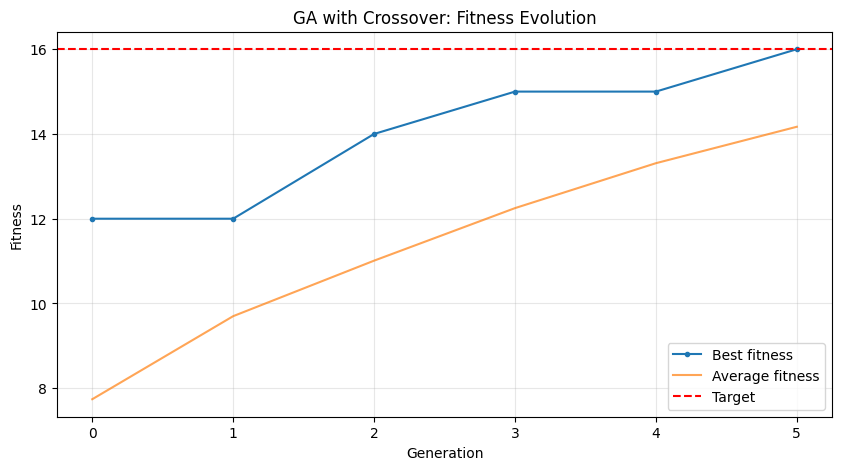

In [75]:
# Genetic Algorithm with Crossover and Mutation

# adicionar gerações para o average convergir

def genetic_algorithm_crossover(target, pop_size=100, generations=100, elite_ratio=0.3, mutation_rate=0.1):
    """
    Genetic algorithm using selection, crossover, and mutation.
    - Keep top 30% as elite
    - Generate remaining 70% by crossover and mutation
    """
    size = len(target)
    n_elite = int(pop_size * elite_ratio)
    
    # inicializar população
    population = [generate_pattern(size) for _ in range(pop_size)]
    
    best_fitness_history = []
    avg_fitness_history = []
    generation = 0
    stagnation = 0
    prev_best = 0
    
    while generation < generations:
        # avaliação da população
        fitnesses = [fitness(ind, target) for ind in population]
        best_fitness = max(fitnesses)
        avg_fitness = np.mean(fitnesses)
        
        best_fitness_history.append(best_fitness)
        avg_fitness_history.append(avg_fitness)
        # print(best_fitness)
        # print(size)
        
        # testar para a solução
        if best_fitness == size:
            # print(best_fitness)
            # print(size)
            return population[np.argmax(fitnesses)], generation, True, best_fitness_history, avg_fitness_history
        
        # Check stagnation
        if best_fitness == prev_best:
            stagnation += 1
            if stagnation >= 20:
                break
        else:
            stagnation = 0
            prev_best = best_fitness
        
        # seleção: manter os indivíduos de elite
        sorted_indices = np.argsort(fitnesses)[::-1]
        elite = [population[i] for i in sorted_indices[:n_elite]]
        
        # criar uma nova população
        new_population = elite.copy()
        
        # Generate offspring by crossover
        while len(new_population) < pop_size:
            # Select two parents from elite
            parent1 = elite[np.random.randint(n_elite)]
            parent2 = elite[np.random.randint(n_elite)]
            
            # Crossover
            offspring1, offspring2 = crossover(parent1, parent2)
            
            # Mutation
            if np.random.random() < mutation_rate:
                offspring1 = mutate(offspring1)
            if np.random.random() < mutation_rate and len(new_population) + 1 < pop_size:
                offspring2 = mutate(offspring2)
            
            new_population.append(offspring1)
            if len(new_population) < pop_size:
                new_population.append(offspring2)
        
        population = new_population[:pop_size]
        generation += 1
    
    # avaliação final
    fitnesses = [fitness(ind, target) for ind in population]
    best_idx = np.argmax(fitnesses)
    
    return population[best_idx], generation, False, best_fitness_history, avg_fitness_history

# testar GA com crossover
print("Genetic Algorithm with Crossover and Mutation\n")
# np.random.seed(42)
target = generate_pattern(working_size)

print(f"Target: {target}")
print(f"Population: 100, Elite: 30%, Mutation rate: 10%\n")

solution, gens, converged, best_hist, avg_hist = genetic_algorithm_crossover(target, generations=100)

print(f"Result:      {solution}")
print(f"Fitness:     {fitness(solution, target)}/{len(target)}")
print(f"Generations: {gens}")
print(f"Converged:   {'Yes' if converged else 'No'}")

# Plot da evolução
plt.figure(figsize=(10, 5))
plt.plot(best_hist, label='Best fitness', marker='o', markersize=3)
plt.plot(avg_hist, label='Average fitness', alpha=0.7)
plt.axhline(y=len(target), color='r', linestyle='--', label='Target')
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.title('GA with Crossover: Fitness Evolution')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

Final comparison over 30 runs (pattern size 16)...

Final Results:

Random Search:
  Success rate: 90.0%
  Avg attempts: 41714
  Avg time: 0.4933s

Hill Climbing:
  Success rate: 100.0%
  Avg attempts: 44
  Avg time: 0.0006s

GA (Mutation):
  Success rate: 100.0%
  Avg attempts: 590
  Avg time: 0.0069s

GA (Crossover):
  Success rate: 100.0%
  Avg attempts: 387
  Avg time: 0.0042s



C:\Users\Ana Maria Ribeiro\AppData\Local\Temp\ipykernel_5808\784722470.py:65: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0].boxplot(attempts_data, labels=method_names)
C:\Users\Ana Maria Ribeiro\AppData\Local\Temp\ipykernel_5808\784722470.py:74: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1].boxplot(times_data, labels=method_names)


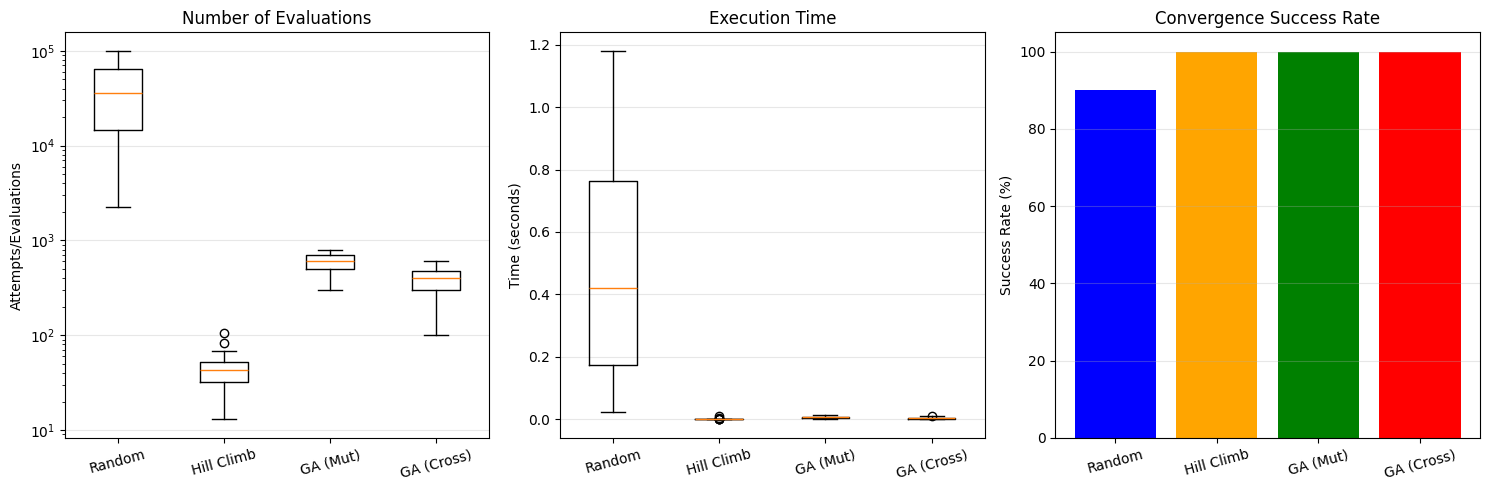


CONCLUSIONS

1. Random search is inefficient for larger patterns
2. Hill climbing converges quickly but gets stuck in local optima
3. GA with mutation has good success rate and reasonable speed
4. GA with crossover explores the search space more effectively
5. Evolutionary algorithms significantly outperform random search


In [42]:
# Comparação final com todos os métodos (30 execuções)
methods_final = {
    'Random Search': {'attempts': [], 'times': [], 'success': []},
    'Hill Climbing': {'attempts': [], 'times': [], 'success': []},
    'GA (Mutation)': {'attempts': [], 'times': [], 'success': []},
    'GA (Crossover)': {'attempts': [], 'times': [], 'success': []}
}

print(f"Final comparison over {n_tests} runs (pattern size {working_size})...\n")

for seed in range(n_tests):
    np.random.seed(seed)
    target = generate_pattern(working_size)
    
    # Random Search
    start = time.time()
    attempts, _ = random_search(target, max_attempts=100000)
    elapsed = time.time() - start
    methods_final['Random Search']['attempts'].append(attempts)
    methods_final['Random Search']['times'].append(elapsed)
    methods_final['Random Search']['success'].append(attempts < 100000)
    
    # Hill Climbing
    start = time.time()
    _, mutations, converged, _ = hill_climbing(target, max_mutations=1000)
    elapsed = time.time() - start
    methods_final['Hill Climbing']['attempts'].append(mutations)
    methods_final['Hill Climbing']['times'].append(elapsed)
    methods_final['Hill Climbing']['success'].append(converged)
    
    # GA Mutation
    start = time.time()
    _, gens, converged, _, _ = genetic_algorithm_mutation(target, generations=100)
    elapsed = time.time() - start
    methods_final['GA (Mutation)']['attempts'].append(100 * gens)
    methods_final['GA (Mutation)']['times'].append(elapsed)
    methods_final['GA (Mutation)']['success'].append(converged)
    
    # GA Crossover
    start = time.time()
    _, gens, converged, _, _ = genetic_algorithm_crossover(target, generations=100)
    elapsed = time.time() - start
    methods_final['GA (Crossover)']['attempts'].append(100 * gens)
    methods_final['GA (Crossover)']['times'].append(elapsed)
    methods_final['GA (Crossover)']['success'].append(converged)

print("Final Results:\n")
for method, data in methods_final.items():
    success_rate = np.mean(data['success']) * 100
    avg_attempts = np.mean(data['attempts'])
    avg_time = np.mean(data['times'])
    print(f"{method}:")
    print(f"  Success rate: {success_rate:.1f}%")
    print(f"  Avg attempts: {avg_attempts:.0f}")
    print(f"  Avg time: {avg_time:.4f}s\n")


# Plot das comparações finais
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

method_names = ['Random', 'Hill Climb', 'GA (Mut)', 'GA (Cross)']

# Plot 1: Attempts
attempts_data = [methods_final[m]['attempts'] for m in methods_final.keys()]
axes[0].boxplot(attempts_data, labels=method_names)
axes[0].set_ylabel('Attempts/Evaluations')
axes[0].set_title('Number of Evaluations')
axes[0].grid(alpha=0.3, axis='y')
axes[0].set_yscale('log')
axes[0].tick_params(axis='x', rotation=15)

# Plot 2: Time
times_data = [methods_final[m]['times'] for m in methods_final.keys()]
axes[1].boxplot(times_data, labels=method_names)
axes[1].set_ylabel('Time (seconds)')
axes[1].set_title('Execution Time')
axes[1].grid(alpha=0.3, axis='y')
axes[1].tick_params(axis='x', rotation=15)

# Plot 3: Success Rate
success_rates = [np.mean(methods_final[m]['success'])*100 for m in methods_final.keys()]
colors = ['blue', 'orange', 'green', 'red']
axes[2].bar(method_names, success_rates, color=colors)
axes[2].set_ylabel('Success Rate (%)')
axes[2].set_title('Convergence Success Rate')
axes[2].set_ylim([0, 105])
axes[2].grid(alpha=0.3, axis='y')
axes[2].tick_params(axis='x', rotation=15)

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("CONCLUSIONS")
print("="*60)
print("\n1. Random search is inefficient for larger patterns")
print("2. Hill climbing converges quickly but gets stuck in local optima")
print("3. GA with mutation has good success rate and reasonable speed")
print("4. GA with crossover explores the search space more effectively")
print("5. Evolutionary algorithms significantly outperform random search")

# Exercício 2

Teste 01 | Tamanho alvo=6 bits | Melhor fitness=1.000 | Gerações=23 | Geração acerto=3 | Tempo=0.01s
Teste 02 | Tamanho alvo=32 bits | Melhor fitness=1.000 | Gerações=38 | Geração acerto=18 | Tempo=0.03s
Teste 03 | Tamanho alvo=9 bits | Melhor fitness=1.000 | Gerações=30 | Geração acerto=10 | Tempo=0.01s
Teste 04 | Tamanho alvo=9 bits | Melhor fitness=1.000 | Gerações=26 | Geração acerto=6 | Tempo=0.01s
Teste 05 | Tamanho alvo=21 bits | Melhor fitness=1.000 | Gerações=37 | Geração acerto=17 | Tempo=0.02s
Teste 06 | Tamanho alvo=27 bits | Melhor fitness=1.000 | Gerações=41 | Geração acerto=21 | Tempo=0.02s
Teste 07 | Tamanho alvo=12 bits | Melhor fitness=1.000 | Gerações=28 | Geração acerto=8 | Tempo=0.01s
Teste 08 | Tamanho alvo=9 bits | Melhor fitness=1.000 | Gerações=25 | Geração acerto=5 | Tempo=0.01s
Teste 09 | Tamanho alvo=16 bits | Melhor fitness=1.000 | Gerações=31 | Geração acerto=11 | Tempo=0.01s
Teste 10 | Tamanho alvo=20 bits | Melhor fitness=1.000 | Gerações=37 | Geração ac

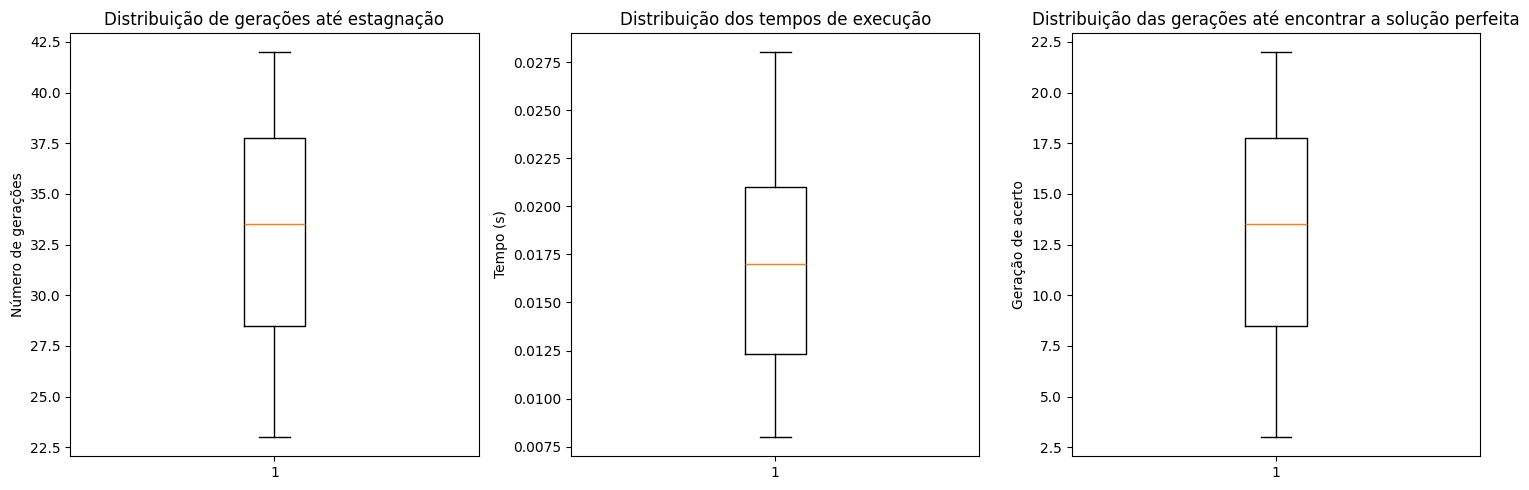


Resumo Estatístico:
Tempo médio: 0.017 s
Gerações médias até parar: 32.9
Geração média de acerto: 12.9
Tamanho médio do padrão alvo: 17.7 bits


In [38]:
import random
import time
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Gerar padrão alvo ---
def gerar_padrao_aleatorio(seed=None):
    """Gera um padrão binário aleatório com tamanho entre 2 e 32 bits."""
    if seed is not None:
        random.seed(seed)
    tamanho = random.randint(2, 32)
    return ''.join(random.choice(['0', '1']) for _ in range(tamanho))

# --- 2. Função de avaliação (fitness) ---
def fitness(guess, target):
    """Mede a semelhança entre guess e target e penaliza diferenças de tamanho."""
    common_len = min(len(guess), len(target))
    matches = sum(guess[i] == target[i] for i in range(common_len))
    len_diff = abs(len(guess) - len(target))
    return (matches / len(target)) - (len_diff / len(target))

# --- 3. Função de mutação ---
def mutar(padrao):
    """Inverte, adiciona ou remove bits (mantendo tamanho entre 2 e 32)."""
    bits = list(padrao)
    op = random.choice(["flip", "add", "remove"])
    if op == "flip":
        i = random.randrange(len(bits))
        bits[i] = '1' if bits[i] == '0' else '0'
    elif op == "add" and len(bits) < 32:
        pos = random.randrange(len(bits) + 1)
        bits.insert(pos, random.choice(['0', '1']))
    elif op == "remove" and len(bits) > 2:
        pos = random.randrange(len(bits))
        bits.pop(pos)
    return ''.join(bits)

# --- 4. Função de cruzamento ---
def crossover(p1, p2):
    """Realiza cruzamento entre dois padrões (mesmo com tamanhos diferentes)."""
    min_len = min(len(p1), len(p2))
    if min_len < 2:
        return p1, p2
    cut = random.randint(1, min_len - 1)
    child1 = p1[:cut] + p2[cut:]
    child2 = p2[:cut] + p1[cut:]
    return child1, child2

# --- 5. Algoritmo evolutivo principal ---
def algoritmo_evolutivo_varlen(pop_size=100, max_gen=500, stall_limit=20, seed=0):
    random.seed(seed)
    target = gerar_padrao_aleatorio(seed + 1)
    populacao = [gerar_padrao_aleatorio(seed + i + 2) for i in range(pop_size)]  # Correção: evita overlap de seed com o alvo

    melhor_fitness = -999
    stall = 0
    geracao = 0
    first_solved_gen = None
    inicio = time.time()

    while stall < stall_limit and geracao < max_gen:
        avaliacao = [fitness(p, target) for p in populacao]
        melhor = max(avaliacao)

        # ✅ Correção: usar geracao atual (começa em 1 na 1ª iteração)
        if first_solved_gen is None and any(f >= 1.0 for f in avaliacao):
            first_solved_gen = geracao + 1  # +1 porque começa em 0

        # Atualiza melhor fitness e estagnação
        if melhor > melhor_fitness:
            melhor_fitness = melhor
            stall = 0
        else:
            stall += 1

        # Seleção dos 30% melhores
        selecionados = [p for _, p in sorted(zip(avaliacao, populacao), reverse=True)]
        top = selecionados[:int(0.3 * pop_size)]

        # Nova população: 30% elite + 70% mutações/cruzamentos
        nova_pop = top.copy()
        while len(nova_pop) < pop_size:
            if random.random() < 0.5:
                p = random.choice(top)
                nova_pop.append(mutar(p))
            else:
                p1, p2 = random.sample(top, 2)
                c1, _ = crossover(p1, p2)
                nova_pop.append(mutar(c1))
        populacao = nova_pop
        geracao += 1

    tempo_exec = time.time() - inicio
    return melhor_fitness, geracao, tempo_exec, target, first_solved_gen

# --- 6. Experimentos repetidos ---
num_testes = 30
resultados_tempo = []
resultados_geracoes = []
geracoes_para_acertar = []
tamanhos_alvo = []

for i in range(num_testes):
    f, g, t, tgt, g_perfeita = algoritmo_evolutivo_varlen(seed=i)
    resultados_tempo.append(t)
    resultados_geracoes.append(g)
    geracoes_para_acertar.append(g_perfeita)
    tamanhos_alvo.append(len(tgt))
    print(f"Teste {i+1:02d} | Tamanho alvo={len(tgt)} bits | Melhor fitness={f:.3f} | "
          f"Gerações={g} | Geração acerto={g_perfeita} | Tempo={t:.2f}s")

# --- 7. Gráficos ---
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.boxplot(resultados_geracoes)
plt.title("Distribuição de gerações até estagnação")
plt.ylabel("Número de gerações")

plt.subplot(1,3,2)
plt.boxplot(resultados_tempo)
plt.title("Distribuição dos tempos de execução")
plt.ylabel("Tempo (s)")

plt.subplot(1,3,3)
plt.boxplot([g for g in geracoes_para_acertar if g is not None])
plt.title("Distribuição das gerações até encontrar a solução perfeita")
plt.ylabel("Geração de acerto")

plt.tight_layout()
plt.show()

# --- 8. Estatísticas Resumo ---
geracoes_validas = [g for g in geracoes_para_acertar if g is not None]
print("\nResumo Estatístico:")
print(f"Tempo médio: {np.mean(resultados_tempo):.3f} s")
print(f"Gerações médias até parar: {np.mean(resultados_geracoes):.1f}")
print(f"Geração média de acerto: {np.mean(geracoes_validas) if geracoes_validas else 0:.1f}")
print(f"Tamanho médio do padrão alvo: {np.mean(tamanhos_alvo):.1f} bits")

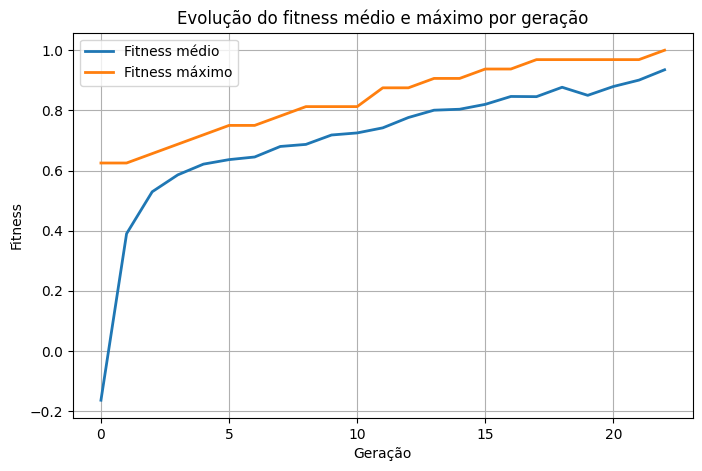

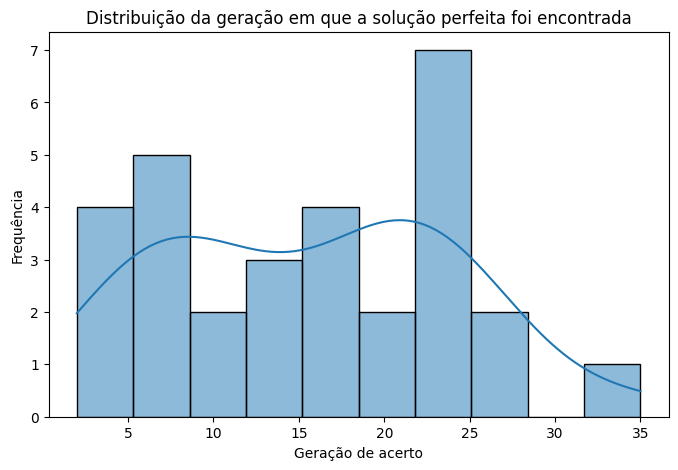

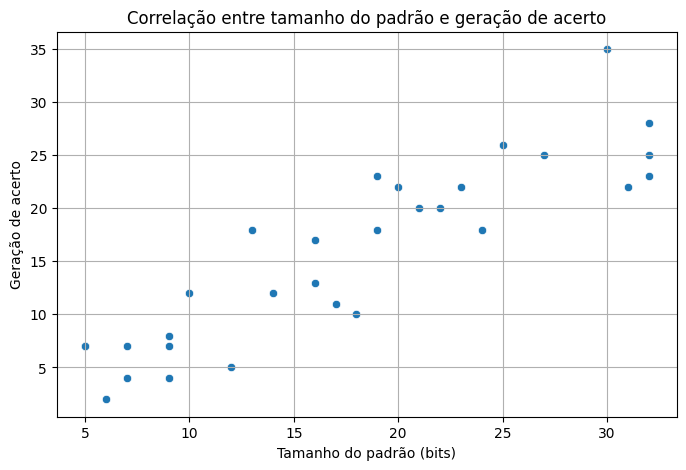

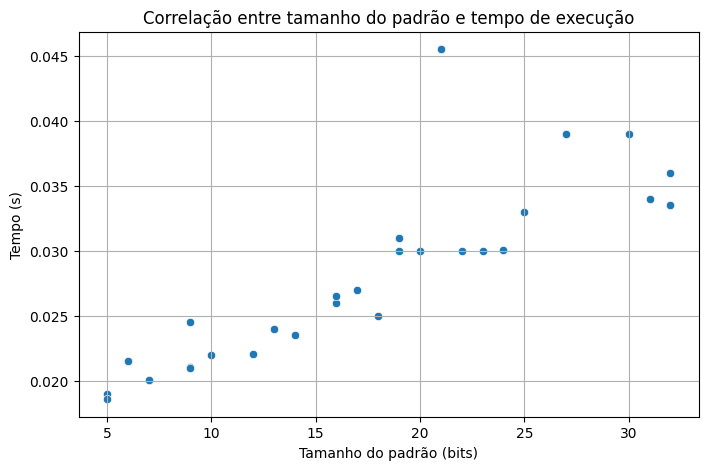

In [33]:
# ============================================
# --- 9. Análises e Plots Adicionais ---
# ============================================

import seaborn as sns

# --- 9.1 Curva de convergência do fitness (médio e máximo por geração) ---
def plot_convergencia(seed=0):
    """Mostra a evolução do fitness médio e máximo ao longo das gerações."""
    random.seed(seed)
    target = gerar_padrao_aleatorio(seed+1)
    pop_size = 50
    populacao = []
    while len(populacao) < pop_size:
        p = gerar_padrao_aleatorio(seed + 100 + len(populacao))
        if p != target:
            populacao.append(p)

    melhor_fitness = -999
    stall = 0
    geracao = 0
    fitness_medio = []
    fitness_maximo = []

    while stall < 100 and geracao < 300:
        avaliacao = [fitness(p, target) for p in populacao]
        fitness_medio.append(np.mean(avaliacao))
        fitness_maximo.append(np.max(avaliacao))

        if np.max(avaliacao) == 1.0:
            break

        selecionados = [p for _, p in sorted(zip(avaliacao, populacao), reverse=True)]
        top = selecionados[:int(0.3 * pop_size)]
        nova_pop = top.copy()

        while len(nova_pop) < pop_size:
            if random.random() < 0.5:
                p = random.choice(top)
                nova_pop.append(mutar(p))
            else:
                p1, p2 = random.sample(top, 2)
                c1, _ = crossover(p1, p2)
                nova_pop.append(mutar(c1))
        populacao = nova_pop
        geracao += 1

    plt.figure(figsize=(8,5))
    plt.plot(fitness_medio, label="Fitness médio", linewidth=2)
    plt.plot(fitness_maximo, label="Fitness máximo", linewidth=2)
    plt.xlabel("Geração")
    plt.ylabel("Fitness")
    plt.title("Evolução do fitness médio e máximo por geração")
    plt.legend()
    plt.grid(True)
    plt.show()

# --- Executar o gráfico de convergência ---
plot_convergencia(seed=1)

# --- 9.2 Histograma da geração de acerto ---
plt.figure(figsize=(8,5))
sns.histplot([g for g in geracoes_para_acertar if g is not None], bins=10, kde=True)
plt.title("Distribuição da geração em que a solução perfeita foi encontrada")
plt.xlabel("Geração de acerto")
plt.ylabel("Frequência")
plt.show()

# --- 9.3 Correlação: tamanho do padrão vs geração de acerto ---
plt.figure(figsize=(8,5))
sns.scatterplot(x=tamanhos_alvo, y=geracoes_para_acertar)
plt.title("Correlação entre tamanho do padrão e geração de acerto")
plt.xlabel("Tamanho do padrão (bits)")
plt.ylabel("Geração de acerto")
plt.grid(True)
plt.show()

# --- 9.4 Correlação: tamanho do padrão vs tempo de execução ---
plt.figure(figsize=(8,5))
sns.scatterplot(x=tamanhos_alvo, y=resultados_tempo)
plt.title("Correlação entre tamanho do padrão e tempo de execução")
plt.xlabel("Tamanho do padrão (bits)")
plt.ylabel("Tempo (s)")
plt.grid(True)
plt.show()


# Exercício 3

Teste 01 | Tamanho alvo=6 dígitos | Melhor fitness=1.000 | Gerações=74 | Geração acerto=24 | Tempo=0.02s
Teste 02 | Tamanho alvo=32 dígitos | Melhor fitness=1.000 | Gerações=181 | Geração acerto=131 | Tempo=0.07s
Teste 03 | Tamanho alvo=9 dígitos | Melhor fitness=1.000 | Gerações=91 | Geração acerto=41 | Tempo=0.04s
Teste 04 | Tamanho alvo=9 dígitos | Melhor fitness=1.000 | Gerações=102 | Geração acerto=52 | Tempo=0.05s
Teste 05 | Tamanho alvo=21 dígitos | Melhor fitness=1.000 | Gerações=152 | Geração acerto=102 | Tempo=0.08s
Teste 06 | Tamanho alvo=27 dígitos | Melhor fitness=1.000 | Gerações=230 | Geração acerto=180 | Tempo=0.08s
Teste 07 | Tamanho alvo=12 dígitos | Melhor fitness=1.000 | Gerações=87 | Geração acerto=37 | Tempo=0.03s
Teste 08 | Tamanho alvo=9 dígitos | Melhor fitness=1.000 | Gerações=91 | Geração acerto=41 | Tempo=0.03s
Teste 09 | Tamanho alvo=16 dígitos | Melhor fitness=1.000 | Gerações=126 | Geração acerto=76 | Tempo=0.04s
Teste 10 | Tamanho alvo=20 dígitos | Melho

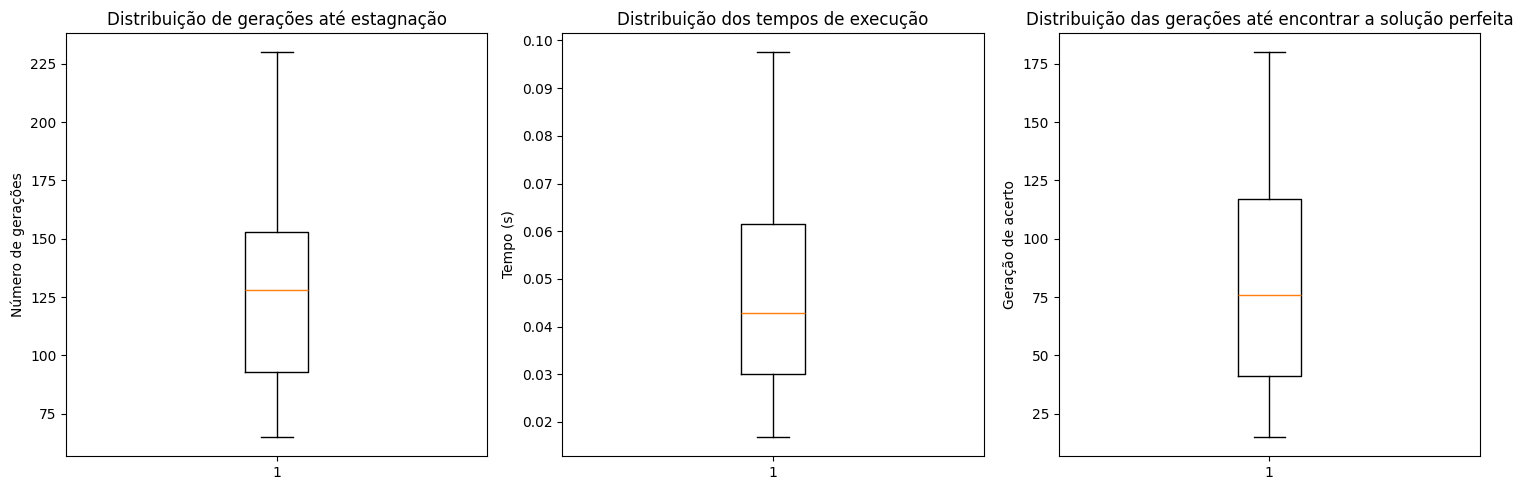


A gerar gráfico de convergência para um teste exemplo...


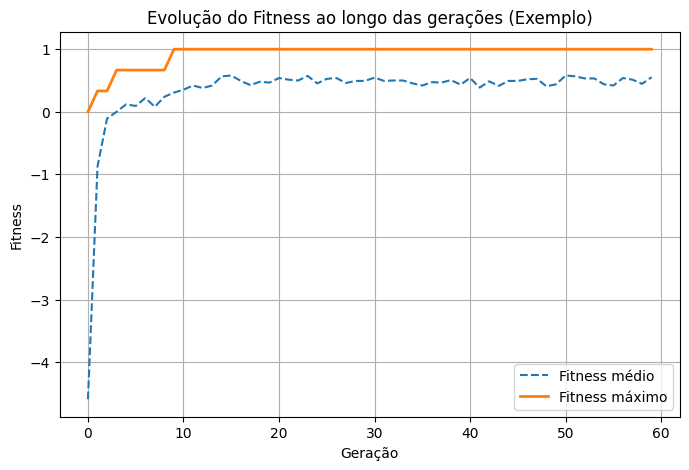

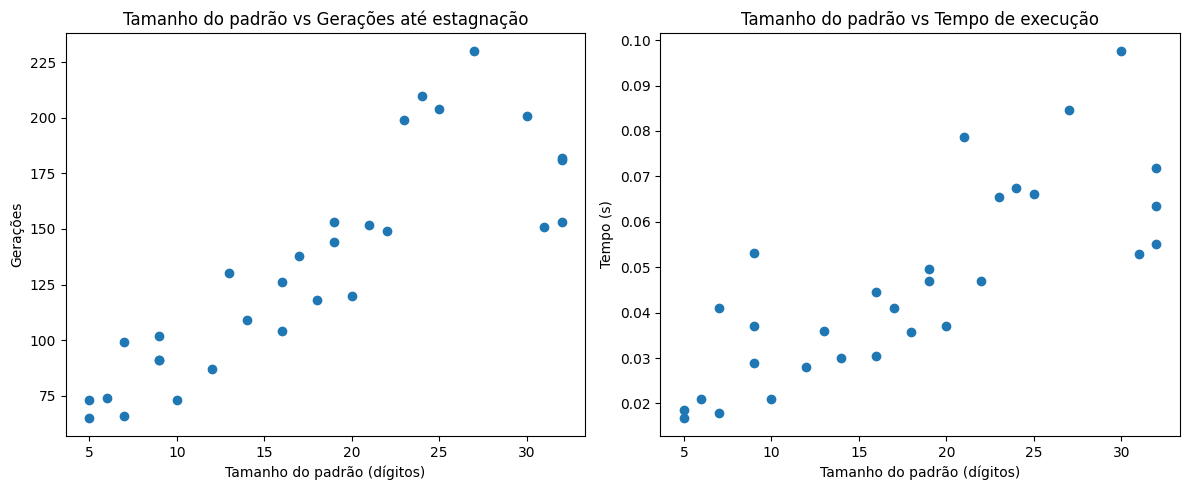

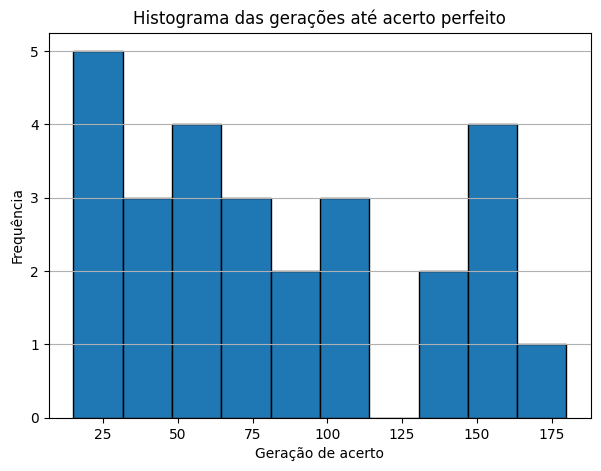


Resumo Estatístico:
Tempo médio: 0.046 s
Gerações médias até parar: 132.5
Geração média de acerto: 81.5
Tamanho médio do padrão alvo: 17.7 dígitos


In [40]:
# ============================================
# EXERCÍCIO 3 – Versão decimal (dígitos 0–9) com análise gráfica avançada
# ============================================

import random
import time
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Gerar padrão alvo ---
def gerar_padrao_aleatorio(seed=None):
    """Gera um padrão decimal aleatório com tamanho entre 2 e 32 dígitos."""
    if seed is not None:
        random.seed(seed)
    tamanho = random.randint(2, 32)
    return ''.join(random.choice([str(i) for i in range(10)]) for _ in range(tamanho))

# --- 2. Função de avaliação (fitness) ---
def fitness(guess, target):
    """Mede a semelhança entre guess e target e penaliza diferenças de tamanho."""
    common_len = min(len(guess), len(target))
    matches = sum(guess[i] == target[i] for i in range(common_len))
    len_diff = abs(len(guess) - len(target))
    return (matches / len(target)) - (len_diff / len(target))

# --- 3. Função de mutação ---
def mutar(padrao):
    """Altera, adiciona ou remove dígitos (mantendo tamanho entre 2 e 32)."""
    bits = list(padrao)
    op = random.choice(["change", "add", "remove"])

    if op == "change":
        i = random.randrange(len(bits))
        novo_digito = random.choice([str(d) for d in range(10) if str(d) != bits[i]])
        bits[i] = novo_digito
    elif op == "add" and len(bits) < 32:
        pos = random.randrange(len(bits) + 1)
        bits.insert(pos, random.choice([str(i) for i in range(10)]))
    elif op == "remove" and len(bits) > 2:
        pos = random.randrange(len(bits))
        bits.pop(pos)
    return ''.join(bits)

# --- 4. Função de cruzamento ---
def crossover(p1, p2):
    """Realiza cruzamento entre dois padrões (mesmo com tamanhos diferentes)."""
    min_len = min(len(p1), len(p2))
    if min_len < 2:
        return p1, p2
    cut = random.randint(1, min_len - 1)
    child1 = p1[:cut] + p2[cut:]
    child2 = p2[:cut] + p1[cut:]
    return child1, child2

# --- 5. Algoritmo evolutivo principal ---
def algoritmo_evolutivo_decimal(pop_size=50, max_gen=500, stall_limit=50, seed=0, track_evolution=False):
    random.seed(seed)
    target = gerar_padrao_aleatorio(seed + 1)

    # Garante que a população inicial não contém o alvo
    populacao = []
    while len(populacao) < pop_size:
        p = gerar_padrao_aleatorio(seed + 100 + len(populacao))
        if p != target:
            populacao.append(p)

    melhor_fitness = -999
    stall = 0
    geracao = 0
    first_solved_gen = None
    inicio = time.time()

    historico_max = []
    historico_medio = []

    while stall < stall_limit and geracao < max_gen:
        avaliacao = [fitness(p, target) for p in populacao]
        melhor = max(avaliacao)
        media = np.mean(avaliacao)

        historico_max.append(melhor)
        historico_medio.append(media)

        if first_solved_gen is None and any(f >= 1.0 for f in avaliacao):
            first_solved_gen = geracao + 1

        if melhor > melhor_fitness:
            melhor_fitness = melhor
            stall = 0
        else:
            stall += 1

        selecionados = [p for _, p in sorted(zip(avaliacao, populacao), reverse=True)]
        top = selecionados[:int(0.3 * pop_size)]

        nova_pop = top.copy()
        while len(nova_pop) < pop_size:
            if random.random() < 0.5:
                p = random.choice(top)
                nova_pop.append(mutar(p))
            else:
                p1, p2 = random.sample(top, 2)
                c1, _ = crossover(p1, p2)
                nova_pop.append(mutar(c1))
        populacao = nova_pop
        geracao += 1

    tempo_exec = time.time() - inicio

    if track_evolution:
        return melhor_fitness, geracao, tempo_exec, target, first_solved_gen, historico_max, historico_medio
    else:
        return melhor_fitness, geracao, tempo_exec, target, first_solved_gen

# --- 6. Experimentos ---
num_testes = 30
resultados_tempo = []
resultados_geracoes = []
geracoes_para_acertar = []
tamanhos_alvo = []

for i in range(num_testes):
    f, g, t, tgt, g_perfeita = algoritmo_evolutivo_decimal(seed=i)
    resultados_tempo.append(t)
    resultados_geracoes.append(g)
    geracoes_para_acertar.append(g_perfeita)
    tamanhos_alvo.append(len(tgt))
    print(f"Teste {i+1:02d} | Tamanho alvo={len(tgt)} dígitos | Melhor fitness={f:.3f} | "
          f"Gerações={g} | Geração acerto={g_perfeita} | Tempo={t:.2f}s")

# --- 7. Boxplots principais ---
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.boxplot(resultados_geracoes)
plt.title("Distribuição de gerações até estagnação")
plt.ylabel("Número de gerações")

plt.subplot(1,3,2)
plt.boxplot(resultados_tempo)
plt.title("Distribuição dos tempos de execução")
plt.ylabel("Tempo (s)")

plt.subplot(1,3,3)
plt.boxplot([g for g in geracoes_para_acertar if g is not None])
plt.title("Distribuição das gerações até encontrar a solução perfeita")
plt.ylabel("Geração de acerto")

plt.tight_layout()
plt.show()

# --- 8. Gráfico da evolução do fitness médio e máximo ---
print("\nA gerar gráfico de convergência para um teste exemplo...")
_, _, _, target_ex, _, hist_max, hist_med = algoritmo_evolutivo_decimal(seed=42, track_evolution=True)

plt.figure(figsize=(8,5))
plt.plot(hist_med, label="Fitness médio", linestyle='--')
plt.plot(hist_max, label="Fitness máximo", linewidth=2)
plt.title("Evolução do Fitness ao longo das gerações (Exemplo)")
plt.xlabel("Geração")
plt.ylabel("Fitness")
plt.legend()
plt.grid(True)
plt.show()

# --- 9. Relação entre tamanho do alvo, gerações e tempo ---
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(tamanhos_alvo, resultados_geracoes)
plt.title("Tamanho do padrão vs Gerações até estagnação")
plt.xlabel("Tamanho do padrão (dígitos)")
plt.ylabel("Gerações")

plt.subplot(1,2,2)
plt.scatter(tamanhos_alvo, resultados_tempo)
plt.title("Tamanho do padrão vs Tempo de execução")
plt.xlabel("Tamanho do padrão (dígitos)")
plt.ylabel("Tempo (s)")

plt.tight_layout()
plt.show()

# --- 10. Histograma das gerações de acerto ---
plt.figure(figsize=(7,5))
plt.hist([g for g in geracoes_para_acertar if g is not None], bins=10, edgecolor='black')
plt.title("Histograma das gerações até acerto perfeito")
plt.xlabel("Geração de acerto")
plt.ylabel("Frequência")
plt.grid(axis='y')
plt.show()

# --- 11. Estatísticas resumo ---
geracoes_validas = [g for g in geracoes_para_acertar if g is not None]
print("\nResumo Estatístico:")
print(f"Tempo médio: {np.mean(resultados_tempo):.3f} s")
print(f"Gerações médias até parar: {np.mean(resultados_geracoes):.1f}")
print(f"Geração média de acerto: {np.mean(geracoes_validas) if geracoes_validas else 0:.1f}")
print(f"Tamanho médio do padrão alvo: {np.mean(tamanhos_alvo):.1f} dígitos")
